In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from auxPlots import interpolateData,getContours,saveContours

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 200)

### Load Recast Data

In [2]:
recastData = pd.read_pickle('limits_cms_top_20_001.pcl')

#print(recastData['yDM (95% C.L.)'])

### Plot limit on yDM

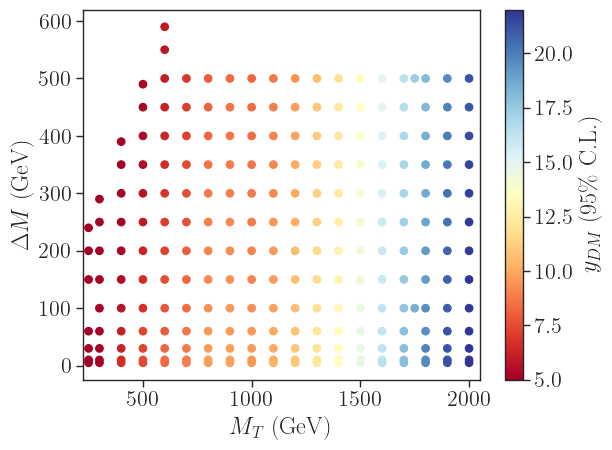

In [3]:
x = recastData['mPsiT']
y = recastData['mSDM']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}$ (95\% C.L.)')
plt.xlabel(r'$M_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(225.,2050.)
# plt.yscale('log')
plt.show()

### Interpolate for a denser grid

In [54]:
# Interpolate to create more points
aux = 0
for i, m in enumerate(x):
    if m <= 1550:
        aux = i
xnew,ynew,znew = interpolateData(x,dm,z)
# Get contours
cValues = sorted([4*np.pi, 5.,10.,15.,20.])
contoursDict = getContours(xnew,ynew,znew,cValues)

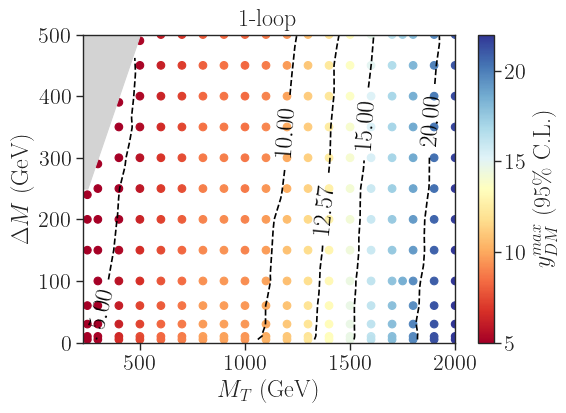

In [55]:
plt.figure(figsize=(6,4))
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)

plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$M_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.fill_betweenx([250.,600.],[250.,600.],color='lightgray',alpha=1.0, label = r'$M_s > M_{T}$')
plt.title('1-loop')
plt.xlim(230.,2000.)
plt.ylim(0.,500.)
plt.show()

In [76]:
recastData[recastData['mPsiT'] ==700.][['mPsiT','mSDM','yDM (95% C.L.)']]

,mPsiT,mSDM,yDM (95% C.L.)
57,700.0,200.0,6.880201
58,700.0,250.0,7.085700
59,700.0,300.0,7.149804
60,700.0,350.0,7.386166
61,700.0,400.0,7.546194
62,700.0,450.0,7.600997
63,700.0,500.0,8.006147
64,700.0,550.0,8.281865
65,700.0,600.0,8.447135
66,700.0,640.0,8.607868


In [77]:
recastData[recastData['mPsiT'] ==1000.][['mPsiT','mSDM','yDM (95% C.L.)']]

,mPsiT,mSDM,yDM (95% C.L.)
96,1000.0,500.0,8.137041
97,1000.0,550.0,8.263694
98,1000.0,600.0,8.380769
99,1000.0,650.0,8.578814
100,1000.0,700.0,8.683816
101,1000.0,750.0,8.754574
102,1000.0,800.0,9.039399
103,1000.0,850.0,9.042677
104,1000.0,900.0,9.267002
105,1000.0,940.0,9.522311


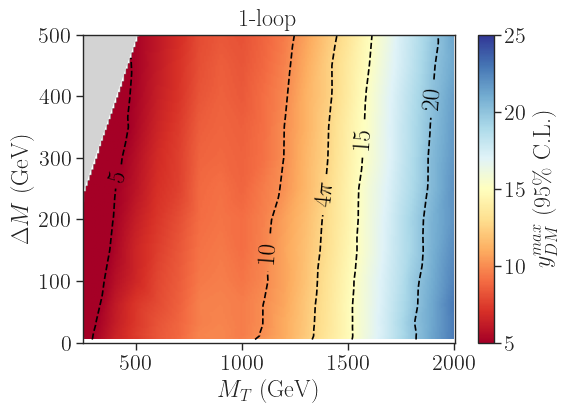

In [78]:
custom_labels = {
    cValues[0]: r'$5$', 
    cValues[1]: r'$10$', 
    cValues[2]: r'$4\pi$',
    cValues[3]: r'$15$',
    cValues[4]: r'$20$'
}
plt
plt.figure(figsize=(6,4))
plt.imshow(znew.T, extent=[x.min(),x.max(), dm.min(), dm.max()], origin='lower',
                  cmap=cm,aspect='auto',vmin=5,vmax=25)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$M_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18, fmt = custom_labels)
plt.fill_betweenx([250.,600.],[250.,600.],color='lightgray',alpha=1.0, label = r'$M_s > M_{T}$')
plt.title('1-loop')
plt.xlim(250.,2005.)
plt.ylim(0.,500.)
plt.savefig('HeatMap_CMS_one_loop.png', bbox_inches='tight')
plt.show()

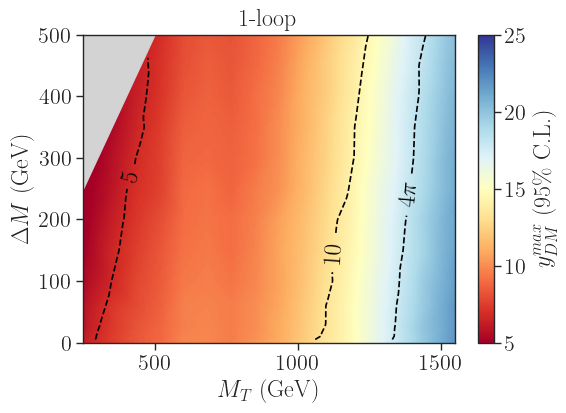

In [79]:
custom_labels = {
    cValues[0]: r'$5$', 
    cValues[1]: r'$10$', 
    cValues[2]: r'$4\pi$'
}
plt.figure(figsize=(6,4))
plt.imshow(znew.T, extent=[100.0,1600.0, 0, 600.0], origin='lower',
                  cmap=cm,aspect='auto',vmin=5,vmax=25)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$M_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues[:3], colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18, fmt = custom_labels)
plt.fill_betweenx([250.,600.],[250.,600.],color='lightgray',alpha=1.0, label = r'$M_s > M_{T}$')
plt.title('1-loop')
plt.xlim(250.,1550.)
plt.ylim(0.,500.)
plt.savefig('HeatMap_CMS_one_loop.png', bbox_inches='tight')
plt.show()

### Save contour curves to text files

In [9]:
fname = 'CMS_mtt_oneLoop_contours.csv'
saveContours(contoursDict,fname,header='mPsiT_GeV,deltaM_GeV')


Contours saved to CMS_mtt_oneLoop_contours.csv
